In [2]:
lev <- read.csv(file="../data/heart_failure_clinical_records_dataset.csv")

In [42]:
ncol(lev)

[1] 13

In [5]:
summary(lev)

      age           anaemia       creatinine_phosphokinase    diabetes     
 Min.   :40.00   Min.   :0.0000   Min.   :  23.0           Min.   :0.0000  
 1st Qu.:51.00   1st Qu.:0.0000   1st Qu.: 116.5           1st Qu.:0.0000  
 Median :60.00   Median :0.0000   Median : 250.0           Median :0.0000  
 Mean   :60.83   Mean   :0.4314   Mean   : 581.8           Mean   :0.4181  
 3rd Qu.:70.00   3rd Qu.:1.0000   3rd Qu.: 582.0           3rd Qu.:1.0000  
 Max.   :95.00   Max.   :1.0000   Max.   :7861.0           Max.   :1.0000  
 ejection_fraction high_blood_pressure   platelets      serum_creatinine
 Min.   :14.00     Min.   :0.0000      Min.   : 25100   Min.   :0.500   
 1st Qu.:30.00     1st Qu.:0.0000      1st Qu.:212500   1st Qu.:0.900   
 Median :38.00     Median :0.0000      Median :262000   Median :1.100   
 Mean   :38.08     Mean   :0.3512      Mean   :263358   Mean   :1.394   
 3rd Qu.:45.00     3rd Qu.:1.0000      3rd Qu.:303500   3rd Qu.:1.400   
 Max.   :80.00     Max.   :1.0

In [14]:
library(tree)
lev2 <- lev
lev2$DEATH_EVENT <- factor(lev2$DEATH_EVENT)

In [18]:
mod1 <- tree(DEATH_EVENT ~., data=lev2)

In [19]:
mod1

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 299 375.300 0 ( 0.67893 0.32107 )  
    2) time < 73.5 76  69.550 1 ( 0.17105 0.82895 )  
      4) serum_sodium < 136.5 39  15.780 1 ( 0.05128 0.94872 )  
        8) ejection_fraction < 47.5 32   0.000 1 ( 0.00000 1.00000 ) *
        9) ejection_fraction > 47.5 7   8.376 1 ( 0.28571 0.71429 ) *
      5) serum_sodium > 136.5 37  45.030 1 ( 0.29730 0.70270 )  
       10) serum_sodium < 139.5 22  30.320 1 ( 0.45455 0.54545 )  
         20) time < 11.5 5   0.000 1 ( 0.00000 1.00000 ) *
         21) time > 11.5 17  23.030 0 ( 0.58824 0.41176 )  
           42) high_blood_pressure < 0.5 9   6.279 0 ( 0.88889 0.11111 ) *
           43) high_blood_pressure > 0.5 8   8.997 1 ( 0.25000 0.75000 ) *
       11) serum_sodium > 139.5 15   7.348 1 ( 0.06667 0.93333 ) *
    3) time > 73.5 223 187.000 0 ( 0.85202 0.14798 )  
      6) serum_creatinine < 1.45 178  93.060 0 ( 0.92697 0.07303 )  
       12) ejection_fraction <

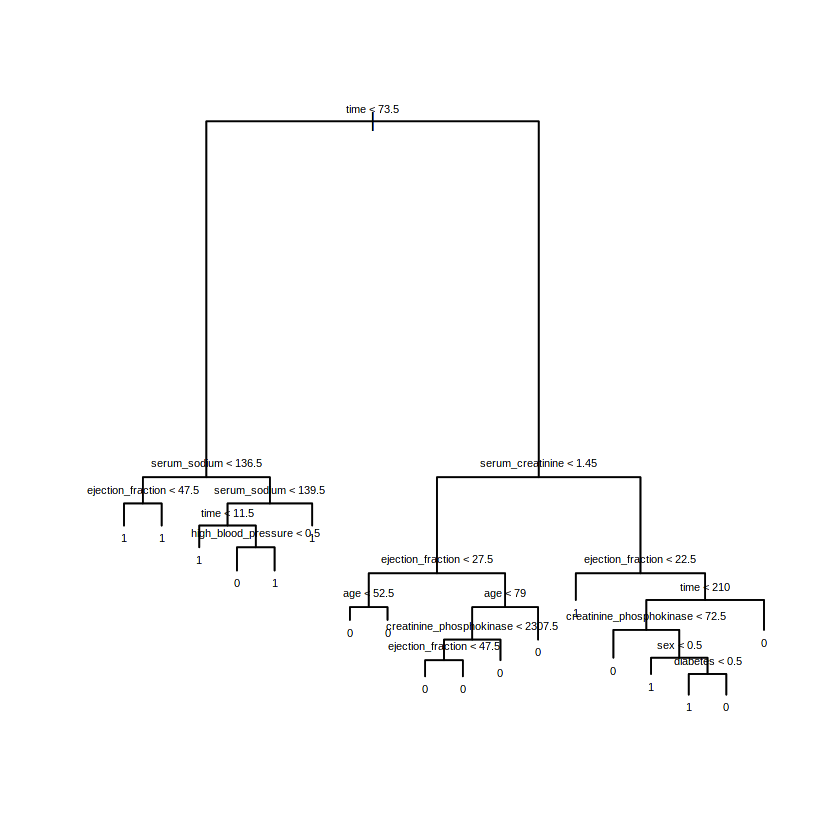

In [20]:
plot(mod1)
text(mod1, cex=0.5)

In [21]:
pred1 <- predict(mod1,newdata = lev,type="class")
table(y=lev$DEATH_EVENT,yhat=pred1 )

   yhat
y     0   1
  0 195   8
  1  15  81

In [22]:
library(randomForest)


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [23]:
mod2 <- randomForest(DEATH_EVENT ~., data=lev2)
mod2 label = y


Call:
 randomForest(formula = DEATH_EVENT ~ ., data = lev2) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 15.05%
Confusion matrix:
    0  1 class.error
0 186 17  0.08374384
1  28 68  0.29166667

In [24]:
library(ranger)


Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance




In [25]:
mod2a <- ranger(DEATH_EVENT ~., data=lev2)
mod2a

Ranger result

Call:
 ranger(DEATH_EVENT ~ ., data = lev2) 

Type:                             Classification 
Number of trees:                  500 
Sample size:                      299 
Number of independent variables:  12 
Mtry:                             3 
Target node size:                 1 
Variable importance mode:         none 
Splitrule:                        gini 
OOB prediction error:             16.39 % 

In [30]:
pred2a <- predict(mod2a, data = lev2, type="response")
pred2a

Ranger prediction

Type:                             Classification 
Sample size:                      299 
Number of independent variables:  12 

In [31]:
table(y=lev2$DEATH_EVENT,yhat=pred2a$predictions)

   yhat
y     0   1
  0 203   0
  1   0  96

In [33]:
#install.packages("fastAdaboost")
library(fastAdaboost)

Installing package into ‘/home/dsuser20/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [36]:
mod3 <- adaboost(DEATH_EVENT ~., data=lev,nIter=10)
mod3

adaboost(formula = DEATH_EVENT ~ ., data = lev, nIter = 10)
DEATH_EVENT ~ .
Dependent Variable: DEATH_EVENT
No of trees:10
The weights of the trees are:0.97871330.83644860.76249070.75952930.85913350.75503650.83450650.80396230.67521790.731618

In [39]:
pred3 <- predict(mod3, newdata = lev2, type="class")
table(y=lev2$DEATH_EVENT,yhat=pred3$class)

   yhat
y     0   1
  0 203   0
  1   0  96

In [41]:
#install.packages("xgboost")
library(xgboost)

Installing package into ‘/home/dsuser20/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



In [43]:
X <- lev[,1:12]
y <- lev$DEATH_EVENT

In [45]:
X <- as.matrix(X)

In [66]:
set.seed(1)
mod4 <- xgboost(data = X, label = y, max_depth = 4, eta=1,nrounds=100, objective="binary:logistic",
                print_every_n =10 )

[1]	train-error:0.103679 
[11]	train-error:0.000000 
[21]	train-error:0.000000 
[31]	train-error:0.000000 
[41]	train-error:0.000000 
[51]	train-error:0.000000 
[61]	train-error:0.000000 
[71]	train-error:0.000000 
[81]	train-error:0.000000 
[91]	train-error:0.000000 
[100]	train-error:0.000000 


In [64]:
pred4 <- predict(mod4, newdata = X)
#pred4

In [51]:
pred4cat <- ifelse(pred4 >= 0.5,1,0)
table(y=lev$DEATH_EVENT,yhat=pred4cat)

   yhat
y     0   1
  0 193  10
  1  25  71

In [65]:
pred4cat <- ifelse(pred4 >= 0.5,1,0)
table(y=lev$DEATH_EVENT,yhat=pred4cat)

   yhat
y     0   1
  0 202   1
  1   0  96